###  Created by Luis Alejandro (alejand@umich.edu)
Builds an MLP classifier to classify the MNIST digits dataset. Uses MLP sklearn implementation.

In [1]:
import time
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate
import scipy.io as sio
import numpy as np
import numpy.random as rnd

In [2]:
def display_subset(X,count=9,order='C'):
    indexes = rnd.permutation(X.shape[0])
    m = int(np.ceil(np.sqrt(count)))
    n = int(np.ceil(count/m))
    fig, axes = plt.subplots(n,m)
    fig.set_size_inches(2*n,2*m)
    fig.set_tight_layout(tight=0.1)
    for i,ax in enumerate(axes.ravel()):
        if i < count:
            ax.matshow(X[indexes[i],:].reshape(28,28,order=order), cmap=plt.cm.gray)
            ax.set_xticks(())
            ax.set_yticks(())
        else:
            fig.delaxes(ax)
            
def display_digit(X,y,count=9,order='C',digit=0):
    indexes = np.where(y == digit)[0]
    indexes = rnd.permutation(indexes)
    m = int(np.ceil(np.sqrt(count)))
    n = int(np.ceil(count/m))
    fig, axes = plt.subplots(n,m)
    fig.set_size_inches(2*n,2*m)
    fig.set_tight_layout(tight=0.1)
    for i,ax in enumerate(axes.ravel()):
        if i < count:
            ax.matshow(X[indexes[i],:].reshape(28,28,order=order), cmap=plt.cm.gray)
            ax.set_xticks(())
            ax.set_yticks(())
        else:
            fig.delaxes(ax)
            
def compute_metrics(mdl,X,y):
    y_pred = mdl.predict(X)
    print('Accuracy: ', '%.2f'  % accuracy_score(y, y_pred))
    print('F1 Score: ', '%.2f'  % f1_score(y, y_pred, average='macro'))
    print('Recall: ', '%.2f'  % recall_score(y, y_pred, average='macro'))
    print('Precision: ', '%.2f'  % precision_score(y, y_pred, average='macro'))

In [3]:
# Loading the data
datafile = sio.loadmat('../../datasets/classification/mnist/emnist-digits.mat')
X1 = datafile['dataset'][0][0]['train'][0][0]['images']
X1 = X1 / 255.
X2 = datafile['dataset'][0][0]['test'][0][0]['images']
X2 = X2 / 255.
y1 = datafile['dataset'][0][0]['train'][0][0]['labels'].ravel()
y2 = datafile['dataset'][0][0]['test'][0][0]['labels'].ravel()
X = np.concatenate((X1,X2))
y = np.concatenate((y1,y2))

In [4]:
# Determines train/test split
use_original_split = False
samples = 5000
if samples > X1.shape[0]:
    samples = X1.shape[0]
# Using original
if use_original_split:
    X_train = X[:samples,:]
    y_train = y[:samples]
    X_test = X[X1.shape[0]:,:]
    y_test = y[X1.shape[0]:]
else:
    m = y.shape[0]
    pct = samples/m
    if pct > 1: pct = 1
    i = np.random.permutation(m)
    X = X[i,:];
    y = y[i]
    m = round(pct*m)
    X_train = X[:m,:]
    X_test = X[m:,:]
    y_train = y[:m]
    y_test = y[m:]

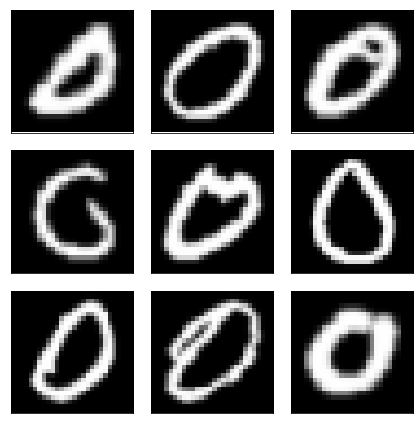

In [5]:
# Displays some examples
display_digit(X_train,y_train,count=9,order='F')

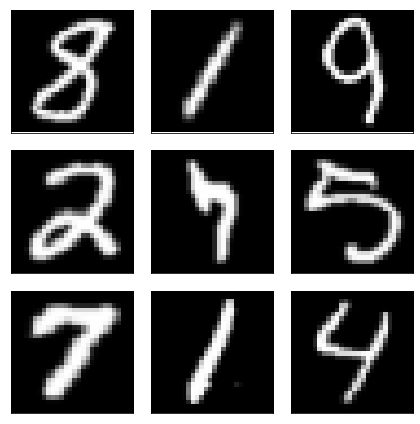

In [6]:
# Displays some examples
display_subset(X_train,order='F', count=9)

In [7]:
# MLP classifier
regularization = 1
mdl = MLPClassifier(hidden_layer_sizes=(30), activation='logistic',
                    max_iter=400, alpha=regularization)

In [8]:
# Training using one single training/test split
print('Training size: ', X_train.shape)
print('Test size: ', X_test.shape)
start = time.perf_counter()
mdl.fit(X_train,y_train)
end = time.perf_counter()
print('\nTime training: ', end - start, ' sec')
print('# of iterations: ', mdl.n_iter_)
print('\nTraining Metrics: ')
compute_metrics(mdl,X_train,y_train)
print('\nTest Metrics: ')
compute_metrics(mdl,X_test,y_test)

Training size:  (5000, 784)
Test size:  (275000, 784)

Time training:  7.197432599999999  sec
# of iterations:  172

Training Metrics: 
Accuracy:  0.94
F1 Score:  0.94
Recall:  0.94
Precision:  0.94

Test Metrics: 
Accuracy:  0.92
F1 Score:  0.92
Recall:  0.92
Precision:  0.92


In [9]:
# Training using K-fold crossvalidation
scores = ['accuracy', 'f1_macro', 'recall_macro', 'precision_macro']
results = cross_validate(mdl, X_train, y_train, cv = 5, n_jobs = -1, scoring=scores,
                         return_estimator=True, return_train_score=True)
print(sorted(results))
print('\nTime training (Avg): ', results['fit_time'].mean())

print('\nTraining Metrics: ')
print('Accuracy (Avg): ', '%.2f' % results['train_accuracy'].mean())
print('F1 Macro (Avg): ', '%.2f' % results['train_f1_macro'].mean())
print('Recall Macro (Avg): ', '%.2f' % results['train_recall_macro'].mean())
print('Precision Macro (Avg): ', '%.2f' % results['train_precision_macro'].mean())

print('\nValidation Metrics: ')
print('Accuracy (Avg): ', '%.2f' % results['test_accuracy'].mean())
print('F1 Macro (Avg): ', '%.2f' % results['test_f1_macro'].mean())
print('Recall Macro (Avg): ', '%.2f' % results['test_recall_macro'].mean())
print('Precision Macro (Avg): ', '%.2f' % results['test_precision_macro'].mean())

['estimator', 'fit_time', 'score_time', 'test_accuracy', 'test_f1_macro', 'test_precision_macro', 'test_recall_macro', 'train_accuracy', 'train_f1_macro', 'train_precision_macro', 'train_recall_macro']

Time training (Avg):  10.85523018836975

Training Metrics: 
Accuracy (Avg):  0.94
F1 Macro (Avg):  0.94
Recall Macro (Avg):  0.94
Precision Macro (Avg):  0.94

Validation Metrics: 
Accuracy (Avg):  0.92
F1 Macro (Avg):  0.92
Recall Macro (Avg):  0.92
Precision Macro (Avg):  0.92
